## Analysis of Supremacy vs Goals Relationship
----------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
pd.options.mode.chained_assignment = None
plt.style.use('ggplot')
%matplotlib inline



In [2]:
df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])
df.head(5)

C:\Users\MikeD\AppData\Local\Temp\ipykernel_11880\2550633606.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\MikeD\\Documents\\Betting\\Football-Data-Combined\\Leagues_Data_Combined.csv', index_col=[0])


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Referee,HTHG,HTAG,HST,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,I1,13/08/2022,Milan,Udinese,4.0,2.0,NaN,2.0,2.0,5.0,...,0.0,0.68,0.20,0.12,0.55,0.45,2.89,2.25,0.64,1.61
1,I1,13/08/2022,Sampdoria,Atalanta,0.0,2.0,NaN,0.0,1.0,1.0,...,0.0,0.21,0.24,0.54,0.56,0.44,2.94,0.97,1.94,-0.97
2,I1,13/08/2022,Lecce,Inter,1.0,2.0,NaN,0.0,1.0,4.0,...,0.0,0.09,0.17,0.74,0.60,0.40,3.10,0.54,2.56,-2.02
3,I1,13/08/2022,Monza,Torino,1.0,2.0,NaN,0.0,1.0,4.0,...,0.0,0.37,0.29,0.34,0.46,0.54,2.53,1.30,1.23,0.07
4,I1,14/08/2022,Fiorentina,Cremonese,3.0,2.0,NaN,2.0,1.0,11.0,...,1.0,0.69,0.19,0.12,0.58,0.42,3.03,2.38,0.65,1.73


In [3]:
df.shape

(152590, 34)

In [31]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Referee',
       'HTHG', 'HTAG', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR',
       'AR', 'TG', 'TST', 'TF', 'TC', 'TY', 'TR', 'HW_%', 'X_%', 'AW_%',
       'Ov2.5_%', 'Un2.5_%', 'Exp', 'HG_Exp', 'AG_Exp', 'Sup Exp'],
      dtype='object')

In [32]:
df['Div'].unique().tolist()

['I1',
 nan,
 'E1',
 'E2',
 'D1',
 'SP1',
 'F1',
 'SC0',
 'SC1',
 'SC2',
 'SC3',
 'N1',
 'D2',
 'P1',
 'SP2',
 'I2',
 'B1',
 'F2',
 'E3',
 'T1',
 'G1',
 'E4']

In [5]:
#Isolate Eng Leagues only
df_eng = df[df['Div'].isin(['E1', 'E2', 'E3', 'E4'])]
df_eng.reset_index(drop=True,inplace=True)
df_eng

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,Referee,HTHG,HTAG,HST,...,TR,HW_%,X_%,AW_%,Ov2.5_%,Un2.5_%,Exp,HG_Exp,AG_Exp,Sup Exp
0,E1,05/08/2022,Crystal Palace,Arsenal,0.0,2.0,A Taylor,0.0,1.0,2.0,...,0.0,0.22,0.27,0.51,0.46,0.54,2.53,0.90,1.63,-0.73
1,E1,06/08/2022,Fulham,Liverpool,2.0,2.0,A Madley,1.0,0.0,3.0,...,0.0,0.09,0.16,0.75,0.64,0.36,3.26,0.55,2.71,-2.16
2,E1,06/08/2022,Bournemouth,Aston Villa,2.0,0.0,P Bankes,1.0,0.0,3.0,...,0.0,0.25,0.27,0.47,0.47,0.53,2.56,0.99,1.55,-0.56
3,E1,06/08/2022,Leeds,Wolves,2.0,1.0,R Jones,1.0,1.0,4.0,...,0.0,0.41,0.29,0.30,0.47,0.53,2.56,1.42,1.14,0.28
4,E1,06/08/2022,Newcastle,Nott'm Forest,2.0,0.0,S Hooper,0.0,0.0,10.0,...,0.0,0.57,0.25,0.17,0.47,0.53,2.56,1.78,0.76,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42487,E4,03/05/2003,Macclesfield,Rochdale,3.0,2.0,K Hill,0.0,1.0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42488,E4,03/05/2003,Oxford,York,2.0,0.0,C Penton,1.0,0.0,4.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42489,E4,03/05/2003,Rushden & D,Hartlepool,1.0,1.0,L Cable,1.0,0.0,6.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42490,E4,03/05/2003,Shrewsbury,Scunthorpe,1.0,2.0,S Tomlin,1.0,0.0,5.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_eng = df_eng[['TG','Sup Exp']]
df_eng['Sup Exp'] = df_eng['Sup Exp'].abs() 

,TG,Sup Exp
0,2.0,-0.73
1,4.0,-2.16
2,2.0,-0.56
3,3.0,0.28
4,2.0,1.02
...,...,...
42487,5.0,NaN
42488,2.0,NaN
42489,2.0,NaN
42490,3.0,NaN


In [94]:
df_eng.describe()

,TG,Sup Exp
count,36356.000000,36356.000000
mean,2.590026,0.565039
std,1.609304,0.477283
min,0.000000,0.000000
25%,1.000000,0.200000
50%,2.000000,0.450000
75%,4.000000,0.800000
max,11.000000,3.280000


In [9]:
df_eng.dropna(inplace=True)
df_eng.reset_index(drop=True,inplace=True)


,TG,Sup Exp
0,2.0,0.73
1,4.0,2.16
2,2.0,0.56
3,3.0,0.28
4,2.0,1.02
...,...,...
36351,5.0,0.23
36352,2.0,0.64
36353,3.0,0.21
36354,0.0,0.26


In [10]:
bin_width = 0.05
bins = 50
min_value = 0
max_value = 2.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_eng['Sup_Bin'] = pd.cut(df_eng['Sup Exp'], bins=bins, labels=labels, right=False, ordered=False)
df_eng.reset_index(drop=True)
df_eng

,TG,Sup Exp,Sup_Bin
0,2.0,0.73,0.73
1,4.0,2.16,2.17
2,2.0,0.56,0.58
3,3.0,0.28,0.28
4,2.0,1.02,1.02
...,...,...,...
36351,5.0,0.23,0.23
36352,2.0,0.64,0.62
36353,3.0,0.21,0.23
36354,0.0,0.26,0.28


In [11]:
df_eng['Sup_Bin'].value_counts()

0.18    2871
0.12    2328
0.28    2260
0.08    2221
0.03    1906
0.38    1827
0.33    1689
0.23    1631
0.43    1560
0.53    1509
0.58    1429
0.47    1385
0.62    1292
0.68    1252
0.78    1152
0.73     980
0.93     951
0.83     868
0.88     854
1.02     810
1.12     619
0.98     591
1.18     488
1.08     454
1.27     366
1.23     311
1.38     290
1.33     231
1.52     199
1.43     195
1.48     193
1.62     181
1.58     138
1.73     134
1.68     113
1.88     106
1.77     101
1.83      85
1.98      80
1.93      72
2.08      72
2.23      72
2.03      71
2.12      56
2.17      53
2.28      47
2.33      43
2.38      32
2.43      22
2.48      18
Name: Sup_Bin, dtype: int64

In [12]:
group_df = df_eng.groupby('Sup_Bin')['TG'].mean().reset_index()


,Sup_Bin,TG
0,0.03,2.556663
1,0.08,2.469158
2,0.12,2.466065
3,0.18,2.548241
4,0.23,2.511343
5,0.28,2.535841
6,0.33,2.455891
7,0.38,2.494800
8,0.43,2.507051
9,0.47,2.470758


#### Scatter Plot to show relationship TG vs Sup

<AxesSubplot:xlabel='Sup_Bin', ylabel='TG'>

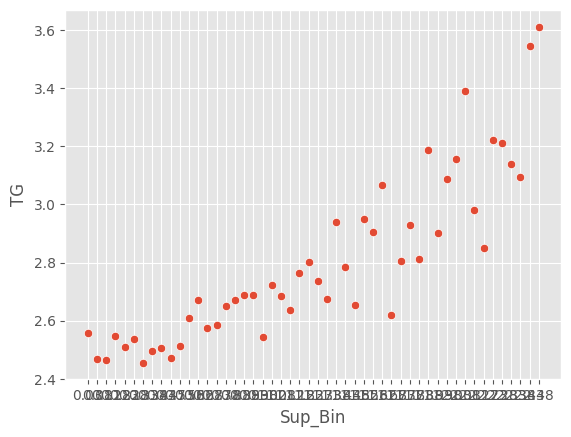

In [13]:
sns.scatterplot(data=group_df, x='Sup_Bin', y='TG')

In [14]:
group_df['Sup_Bin'] = group_df['Sup_Bin'].astype('float')

       2
0.135 x + 0.007336 x + 2.51


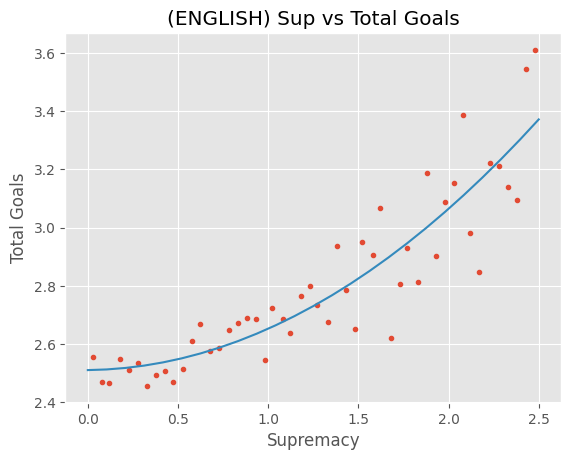

In [15]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,2.5,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('(ENGLISH) Sup vs Total Goals')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Goals')
    
    plt.show()
    plt.close()
    
x = group_df['Sup_Bin']
y = group_df['TG']

# declare poly degree
degree = 2

f = np.polyfit(x,y,degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'Supremacy')

#### Conclusion
For English football, the relationship between Supremacy and Total Goals can be expressed as:
       
##### y = 0.135 x^2 + 0.007336 x + 2.51

##### Calculate R^2 to see how well curve fits the data

In [16]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.8186909588158311


#### _____________________________________________________________________________

### Italy - Serie A & Serie B

In [17]:
df_italy = df[df['Div'].isin(['I1', 'I2'])]
#df_italy.reset_index(drop=True,inplace=True)
df_italy = df_italy[['TG','Sup Exp']]
df_italy['Sup Exp'] = df_italy['Sup Exp'].abs() 
df_italy.dropna(inplace=True)

In [18]:
df_italy.describe()

,TG,Sup Exp
count,14654.000000,14654.000000
mean,2.544356,0.665509
std,1.607001,0.535864
min,0.000000,0.000000
25%,1.000000,0.260000
50%,2.000000,0.520000
75%,4.000000,0.937500
max,10.000000,3.100000


In [72]:
bin_width = 0.1
bins = 25
min_value = 0
max_value = 2.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_italy['Sup_Bin'] = pd.cut(df_italy['Sup Exp'], bins=bins, labels=labels, right=False, ordered=False)
df_italy.reset_index(drop=True)
group_df_italy = df_italy.groupby('Sup_Bin')['TG'].mean().reset_index()
group_df_italy['Sup_Bin'] = group_df_italy['Sup_Bin'].astype('float')

        2
0.1111 x + 0.115 x + 2.389


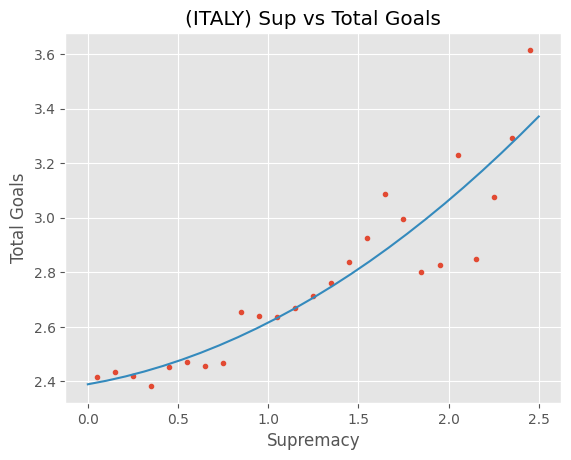

In [73]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,2.5,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('(ITALY) Sup vs Total Goals')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Goals')
    
    plt.show()
    plt.close()
    
x = group_df_italy['Sup_Bin']
y = group_df_italy['TG']

# declare poly degree
degree = 2

f = np.polyfit(x,y,degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'Supremacy')

In [74]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.8504633358524812


#### Conclusion
For Italian football, the relationship between Supremacy and Total Goals can be expressed as:
       
##### y = 0.1111 x^2 + 0.115 x + 2.389

### ____________________________________________________________________________

### Germany - Bund & 2.Bund

In [57]:
df_ger = df[df['Div'].isin(['D1', 'D2'])]
df_ger = df_ger[['TG','Sup Exp']]
df_ger['Sup Exp'] = df_ger['Sup Exp'].abs() 
df_ger.dropna(inplace=True)

In [58]:
df_ger.describe()

,TG,Sup Exp
count,10927.000000,10927.000000
mean,2.827034,0.697932
std,1.689495,0.577371
min,0.000000,0.000000
25%,2.000000,0.260000
50%,3.000000,0.540000
75%,4.000000,1.000000
max,11.000000,3.280000


In [65]:
bin_width = 0.10
bins = 25
min_value = 0
max_value = 2.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_ger['Sup_Bin'] = pd.cut(df_ger['Sup Exp'], bins=bins, labels=labels, right=False, ordered=False)
df_ger.reset_index(drop=True)


,TG,Sup Exp,Sup_Bin
0,7.0,1.68,1.65
1,4.0,0.47,0.45
2,3.0,0.32,0.35
3,4.0,0.49,0.45
4,4.0,0.88,0.85
...,...,...,...
10922,1.0,0.36,0.35
10923,4.0,0.82,0.85
10924,5.0,1.92,1.95
10925,2.0,0.27,0.25


In [68]:
group_df_ger = df_ger.groupby('Sup_Bin')['TG'].mean().reset_index()
group_df_ger['Sup_Bin'] = group_df_ger['Sup_Bin'].astype('float')

         2
0.02882 x + 0.2637 x + 2.618


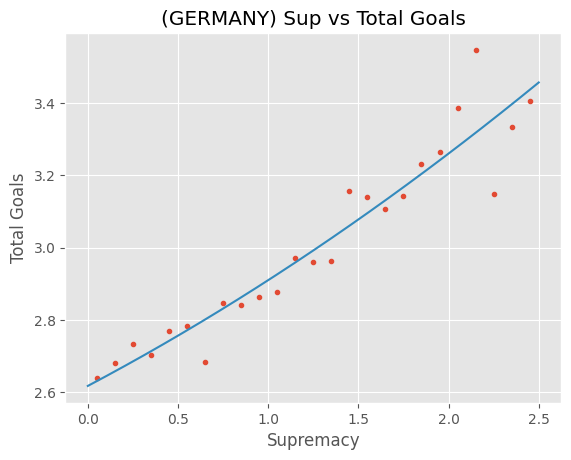

In [69]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,2.5,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('(GERMANY) Sup vs Total Goals')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Goals')
    
    plt.show()
    plt.close()
    
x = group_df_ger['Sup_Bin']
y = group_df_ger['TG']

# declare poly degree
degree = 2

f = np.polyfit(x,y,degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'Supremacy')

In [70]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.905265447435198


#### Conclusion
For German football, the relationship between Supremacy and Total Goals can be expressed as:
       
##### y = 0.02882 x^2 + 0.2637 x + 2.618


### __________________________________________________________________________

### Spain - LaLiga 1 & 2

In [33]:
df_sp = df[df['Div'].isin(['SP1', 'SP2'])]
df_sp = df_sp[['TG','Sup Exp']]
df_sp['Sup Exp'] = df_sp['Sup Exp'].abs() 
df_sp.dropna(inplace=True)

In [34]:
df_sp.describe()

,TG,Sup Exp
count,14969.000000,14969.000000
mean,2.480126,0.625407
std,1.613353,0.543008
min,0.000000,0.000000
25%,1.000000,0.240000
50%,2.000000,0.480000
75%,3.000000,0.840000
max,12.000000,3.320000


In [75]:
bin_width = 0.1
bins = 25
min_value = 0
max_value = 2.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_sp['Sup_Bin'] = pd.cut(df_sp['Sup Exp'], bins=bins, labels=labels, right=False, ordered=False)
df_sp.reset_index(drop=True)
group_df_sp = df_sp.groupby('Sup_Bin')['TG'].mean().reset_index()
group_df_sp['Sup_Bin'] = group_df_sp['Sup_Bin'].astype('float')

         2
0.09335 x + 0.2381 x + 2.264


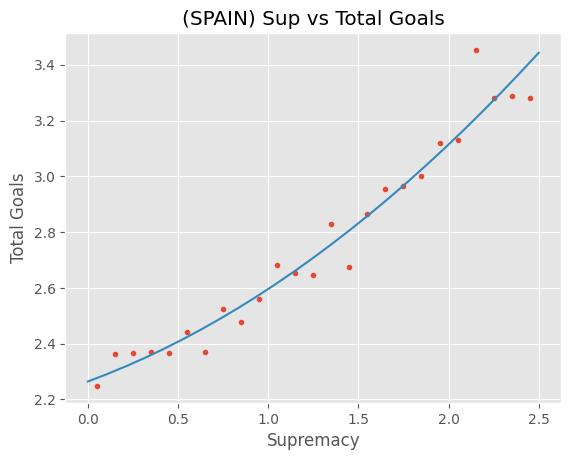

In [85]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,2.5,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('(SPAIN) Sup vs Total Goals')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Goals')
    
    plt.show()
    plt.close()
    
x = group_df_sp['Sup_Bin']
y = group_df_sp['TG']

# declare poly degree
degree = 2

f = np.polyfit(x,y,degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'Supremacy')

In [78]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.9567125313592623


#### Conclusion
For Spanish football, the relationship between Supremacy and Total Goals can be expressed as:
       
##### y = 0.09335 x^2 + 0.2381 x + 2.264


### _________________________________________________________________________

### All Leagues Combined

In [80]:
df_all = df[['TG','Sup Exp']]
df_all['Sup Exp'] = df_all['Sup Exp'].abs() 
df_all.dropna(inplace=True)

In [81]:
df_all.describe()

,TG,Sup Exp
count,129056.000000,129056.000000
mean,2.613470,0.660489
std,1.636822,0.558230
min,0.000000,0.000000
25%,1.000000,0.240000
50%,2.000000,0.510000
75%,4.000000,0.930000
max,13.000000,3.320000


In [82]:
bin_width = 0.1
bins = 25
min_value = 0
max_value = 2.5

bins = np.arange(min_value, max_value + bin_width, bin_width)
midpoints = (bins[:-1] + bins[1:]) / 2
labels = [f'{x:.2f}' for x in midpoints]

df_all['Sup_Bin'] = pd.cut(df_all['Sup Exp'], bins=bins, labels=labels, right=False, ordered=False)
df_all.reset_index(drop=True)
group_df_all = df_all.groupby('Sup_Bin')['TG'].mean().reset_index()
group_df_all['Sup_Bin'] = group_df_all['Sup_Bin'].astype('float')

         2
0.07927 x + 0.1916 x + 2.428


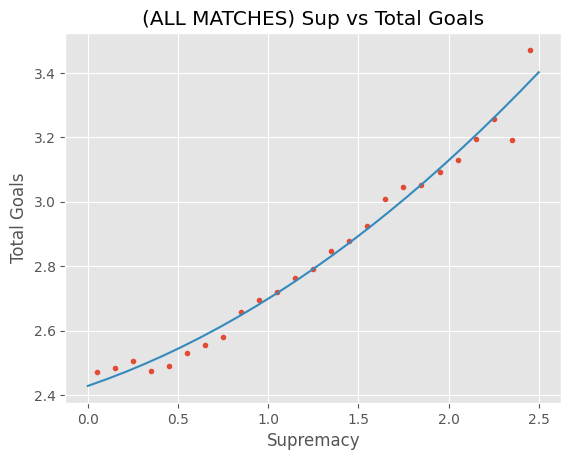

In [83]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,2.5,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('(ALL MATCHES) Sup vs Total Goals')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Total Goals')
    
    plt.show()
    plt.close()
    
x = group_df_all['Sup_Bin']
y = group_df_all['TG']

# declare poly degree
degree = 2

f = np.polyfit(x,y,degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'Supremacy')

In [84]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.9811518985717266


#### Conclusion
For ALL football combined, the relationship between Supremacy and Total Goals can be expressed as:
       
##### y = 0.07927 x^2 + 0.1916 x + 2.428

### _____________________________________________________________________________________

### Convert ALL Matches to '% from Avg' vs Sup, so can be used for any league when pre-season projections are made for coming season expected average goals

In [103]:
group_df_all['Avg_TG'] = round(group_df_all.groupby('Sup_Bin')['TG'].transform('mean'),2)
x = df_all['TG'].mean() 
group_df_all['%_fr_Av_TG'] = round(group_df_all['Avg_TG'] / x ,2)

group_df_all.reset_index(drop=True, inplace=True)
group_df_all

,Sup_Bin,TG,Avg_TG,%_fr_Av_TG
0,0.05,2.471962,2.47,0.95
1,0.15,2.482323,2.48,0.95
2,0.25,2.505661,2.51,0.96
3,0.35,2.473002,2.47,0.95
4,0.45,2.489902,2.49,0.95
5,0.55,2.530926,2.53,0.97
6,0.65,2.555371,2.56,0.98
7,0.75,2.579447,2.58,0.99
8,0.85,2.657987,2.66,1.02
9,0.95,2.696099,2.70,1.03


         2
0.03075 x + 0.07166 x + 0.9312


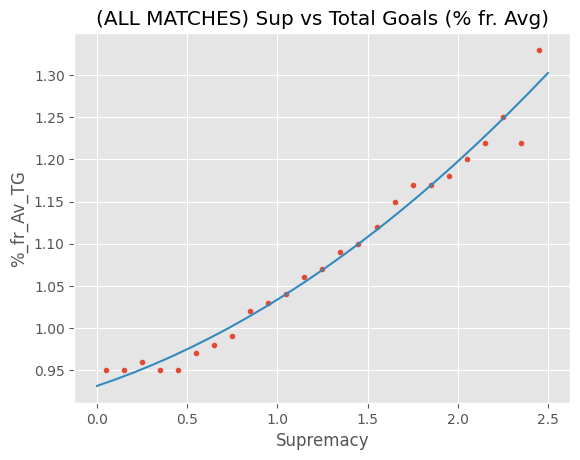

In [105]:
def PlotPolly(model, ind_var, dep_var, Name):
    x_new = np.linspace(0,2.5,25)
    y_new = model(x_new)
    
    plt.plot(ind_var, dep_var, '.', x_new, y_new, '-')
    plt.title('(ALL MATCHES) Sup vs Total Goals (% fr. Avg)')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('%_fr_Av_TG')
    
    plt.show()
    plt.close()
    
x = group_df_all['Sup_Bin']
y = group_df_all['%_fr_Av_TG']

# declare poly degree
degree = 2

f = np.polyfit(x,y,degree)
p = np.poly1d(f)
print(p)

# lets visualize this by by parsing the 'PlotPolly' function 
PlotPolly(p,x,y,'Supremacy')

#### Conclusion
For ALL football combined, the relationship between Supremacy and '% from Average Total Goals' can be expressed as:
       
##### y = 0.031 x^2 + 0.072 x + 0.931
The average expected goals for the season can be used to calculate expected goals given the supremacy